In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
crash_features_2018=pd.read_csv('../images_and_data/autoregression/crash_features_2018.csv')
crash_features_2019=pd.read_csv('../images_and_data/autoregression/crash_features_2019.csv')
crash_features_2020=pd.read_csv('../images_and_data/autoregression/crash_features_2020.csv')

In [40]:
crash_features_2018=crash_features_2018[['COLLISION_ID','CRASH DATE','CRASH TIME','BOROUGH','ON STREET NAME','CROSS STREET NAME']]
crash_features_2019=crash_features_2019[['COLLISION_ID','CRASH DATE','CRASH TIME','BOROUGH','ON STREET NAME','CROSS STREET NAME']]
crash_features_2020=crash_features_2020[['COLLISION_ID','CRASH DATE','CRASH TIME','BOROUGH','ON STREET NAME','CROSS STREET NAME']]

In [41]:
#concatenate dataframes for all 3 years
crash_features=pd.DataFrame()
for frame in [crash_features_2018,crash_features_2019,crash_features_2020]:
    crash_features=pd.concat([crash_features,frame])
crash_features

,COLLISION_ID,CRASH DATE,CRASH TIME,BOROUGH,ON STREET NAME,CROSS STREET NAME
0,3821772,01/01/2018,21:30,BROOKLYN,EAST 53 STREET,AVENUE N
1,4060842,01/01/2018,14:30,MANHATTAN,RIVERSIDE DRIVE,PAYSON AVENUE
2,3818865,01/01/2018,15:20,BRONX,WEBSTER AVENUE,EAST 188 STREET
3,3820768,01/01/2018,21:45,NaN,149 PLACE,NORTHERN BOULEVARD
4,3819019,01/01/2018,7:50,MANHATTAN,NaN,NaN
...,...,...,...,...,...,...
80643,4356522,10/09/2020,15:20,BROOKLYN,NaN,NaN
80644,4356596,10/09/2020,14:30,NaN,LONG ISLAND EXPRESSWAY,NaN
80645,4355971,10/09/2020,4:40,BRONX,GERARD AVENUE,EAST 146 STREET
80646,4356213,10/09/2020,16:30,MANHATTAN,WEST BROADWAY,SPRING STREET


In [42]:
crash_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489198 entries, 0 to 80647
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   COLLISION_ID       489198 non-null  int64 
 1   CRASH DATE         489198 non-null  object
 2   CRASH TIME         489198 non-null  object
 3   BOROUGH            332139 non-null  object
 4   ON STREET NAME     364271 non-null  object
 5   CROSS STREET NAME  238608 non-null  object
dtypes: int64(1), object(5)
memory usage: 26.1+ MB


In [43]:
#convert 'CRASH DATE' and 'CRASH TIME' to pandas datetime
crash_features['CRASH DATE']=pd.to_datetime(crash_features['CRASH DATE'])
crash_features['CRASH TIME']=pd.to_datetime(crash_features['CRASH TIME'])

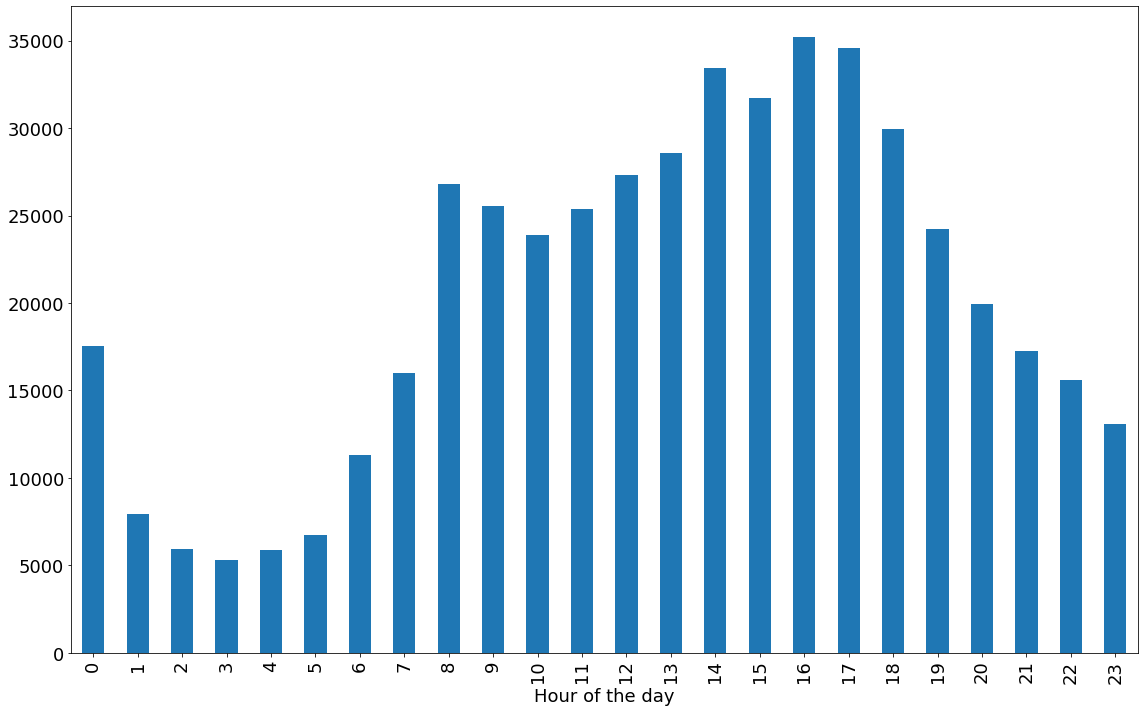

In [69]:
#group data by hour of the day and plot
df_crash_by_time=crash_features.groupby(by=crash_features['CRASH TIME'].dt.hour).count()
df_crash_by_time['COLLISION_ID'].plot(kind='bar',figsize=(16,10))
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
plt.xlabel('Hour of the day', fontsize=18)
plt.tight_layout()
plt.savefig('./images/Crashes_by_hour_of_day.png')

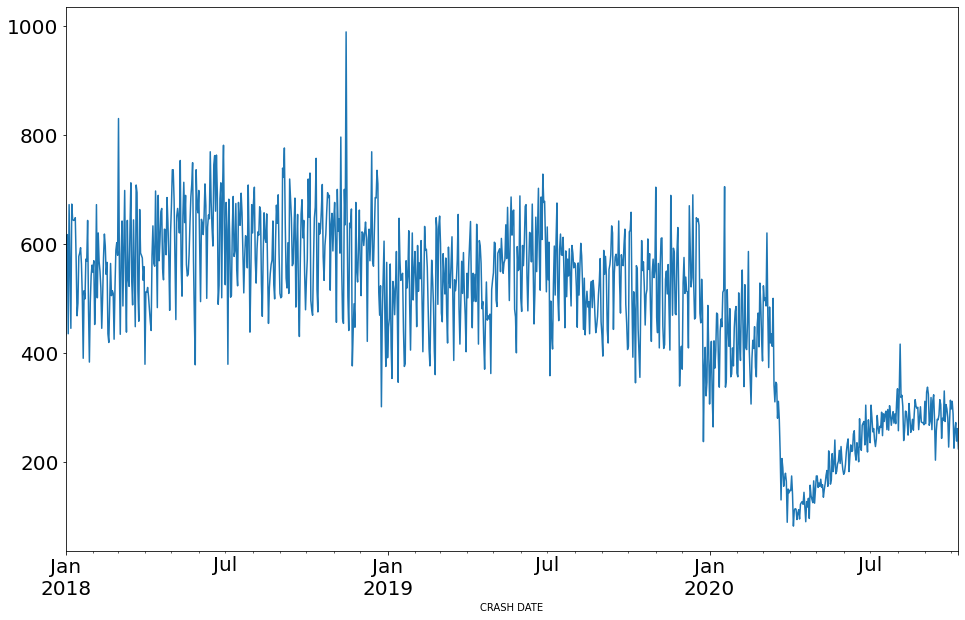

In [44]:
#group data by date and plot the trend of number of collisions per day
df_crash_by_date=crash_features.groupby(by=['CRASH DATE']).count()
df_crash_by_date['COLLISION_ID'].plot(figsize=(16,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

In [45]:
crash_features.columns

Index(['COLLISION_ID', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ON STREET NAME',
       'CROSS STREET NAME'],
      dtype='object')

In [46]:
#Number of crashes in NYC for each of the 3 years
crash_features.groupby(crash_features['CRASH DATE'].dt.year).count()

,COLLISION_ID,CRASH DATE,CRASH TIME,BOROUGH,ON STREET NAME,CROSS STREET NAME
CRASH DATE,,,,,,
2018,215442,215442,215442,144046,161833,104891
2019,193108,193108,193108,132323,143899,95354
2020,80648,80648,80648,55770,58539,38363


In [53]:
#df_crash_by_borough=
df_crash_by_borough=crash_features.groupby(['BOROUGH','CRASH DATE'])[['COLLISION_ID']].count()
df_crash_by_borough.rename(columns={'COLLISION_ID':'NUMBER OF COLLISIONS'},inplace=True)
df_crash_by_borough

NUMBER OF COLLISIONS
BOROUGH       CRASH DATE                      
BRONX         2018-01-01                    42
              2018-01-02                    59
              2018-01-03                    63
              2018-01-04                    57
              2018-01-05                    73
...                                        ...
STATEN ISLAND 2020-10-05                     4
              2020-10-06                     4
              2020-10-07                     5
              2020-10-08                     3
              2020-10-09                     6

[5064 rows x 1 columns]

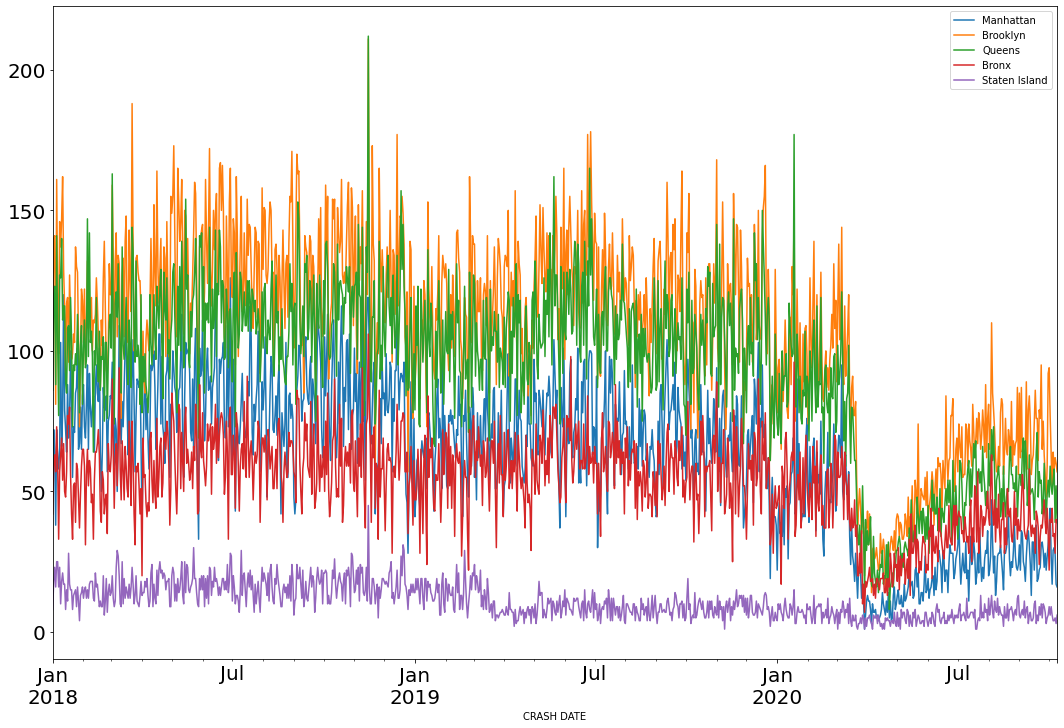

In [54]:
#Plotting trends for each of the Boroughs individually

import matplotlib.pyplot as plt
fig,ax=plt.subplots()
df_crash_by_borough.loc[('MANHATTAN',)]['NUMBER OF COLLISIONS'].plot(label='Manhattan',figsize=(18,12))
df_crash_by_borough.loc[('BROOKLYN',)]['NUMBER OF COLLISIONS'].plot(label='Brooklyn')
df_crash_by_borough.loc[('QUEENS',)]['NUMBER OF COLLISIONS'].plot(label='Queens')
df_crash_by_borough.loc[('BRONX',)]['NUMBER OF COLLISIONS'].plot(label='Bronx')
df_crash_by_borough.loc[('STATEN ISLAND',)]['NUMBER OF COLLISIONS'].plot(label='Staten Island')
plt.legend()
plt.rcParams["legend.loc"] = 'best'

In [ ]:
# 
df_crash_by_borough.loc[('MANHATTAN',)]['NUMBER OF COLLISIONS'].plot(label='Manhattan',figsize=(18,12))

In [ ]:
#
crash_locations_manhattan=crash_features[crash_features['BOROUGH']=='MANHATTAN'].groupby(by='ON STREET NAME').count()
crash_locations_manhattan.sort_values(by='COLLISION_ID',ascending=False,inplace=True)
crash_locations_manhattan.rename(columns={'COLLISION_ID':'NUMBER_OF_COLLISIONS'},inplace=True)
crash_locations_manhattan[['NUMBER_OF_COLLISIONS']].head()

In [ ]:
crash_locations_brooklyn=crash_features[crash_features['BOROUGH']=='BROOKLYN'].groupby(by='ON STREET NAME').count()
crash_locations_brooklyn.sort_values(by='COLLISION_ID',ascending=False,inplace=True)
crash_locations_brooklyn.rename(columns={'COLLISION_ID':'NUMBER_OF_COLLISIONS'},inplace=True)
crash_locations_brooklyn[['NUMBER_OF_COLLISIONS']].head()

In [49]:
crash_locations_queens=crash_features[crash_features['BOROUGH']=='QUEENS'].groupby(by='ON STREET NAME').count()
crash_locations_queens.sort_values(by='COLLISION_ID',ascending=False,inplace=True)
crash_locations_queens.rename(columns={'COLLISION_ID':'NUMBER_OF_COLLISIONS'},inplace=True)
crash_locations_queens[['NUMBER_OF_COLLISIONS']].head()

,NUMBER_OF_COLLISIONS
ON STREET NAME,
NORTHERN BOULEVARD,1862
QUEENS BOULEVARD,1525
NORTH CONDUIT AVENUE,1286
WOODHAVEN BOULEVARD,1135
ROCKAWAY BOULEVARD,1006


In [50]:
crash_locations_bronx=crash_features[crash_features['BOROUGH']=='BRONX'].groupby(by='ON STREET NAME').count()
crash_locations_bronx.sort_values(by='COLLISION_ID',ascending=False,inplace=True)
crash_locations_bronx.rename(columns={'COLLISION_ID':'NUMBER_OF_COLLISIONS'},inplace=True)
crash_locations_bronx[['NUMBER_OF_COLLISIONS']].head()

,NUMBER_OF_COLLISIONS
ON STREET NAME,
BRUCKNER BOULEVARD,1364
EAST TREMONT AVENUE,875
JEROME AVENUE,803
GRAND CONCOURSE,684
BOSTON ROAD,683


In [51]:
crash_locations_staten_island=crash_features[crash_features['BOROUGH']=='STATEN ISLAND'].groupby(by='ON STREET NAME').count()
crash_locations_staten_island.sort_values(by='COLLISION_ID',ascending=False,inplace=True)
crash_locations_staten_island.rename(columns={'COLLISION_ID':'NUMBER_OF_COLLISIONS'},inplace=True)
crash_locations_staten_island[['NUMBER_OF_COLLISIONS']].head()

,NUMBER_OF_COLLISIONS
ON STREET NAME,
HYLAN BOULEVARD,821
RICHMOND ROAD,397
AMBOY ROAD,270
VICTORY BOULEVARD,238
CLOVE ROAD,226
